In [1]:
# libraries
import sys
import pandas as pd
import numpy as np
from pandas               import DataFrame
from pandas               import Series
from pandas               import read_csv
from pandas               import get_dummies
from numpy                import array
from numpy                import random
from numpy                import where
from numpy                import nan
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
from sklearn.utils          import resample
from sklearn.metrics        import confusion_matrix
from sklearn.model_selection        import train_test_split
from sklearn.model_selection        import KFold
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
#local libraries
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [3]:
# Import data
path = "C:/Users/jmotyl/Documents/Kaggle/mbd2019-in-class-competition-bank-mkt/"

In [4]:
Train = pd.read_csv(path+"bank_mkt_train.csv",sep=",")
Test = pd.read_csv(path+ "bank_mkt_test.csv",sep=",")
Train.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,2,29,housemaid,single,high.school,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
1,3,39,unemployed,married,basic.9y,unknown,yes,no,telephone,jun,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2,4,49,blue-collar,married,basic.6y,unknown,no,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
3,5,32,self-employed,single,university.degree,no,yes,no,cellular,may,...,3,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
4,6,29,admin.,single,high.school,unknown,yes,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0


In [5]:
pd.DataFrame.describe(Train.age)

count    7000.000000
mean       40.343571
std        10.602487
min        18.000000
25%        32.000000
50%        38.000000
75%        48.000000
max        98.000000
Name: age, dtype: float64

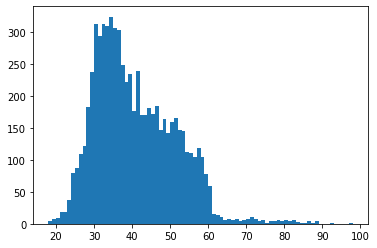

In [6]:
plt.hist(Train.age,bins=80)
plt.show()

In [7]:
pd.DataFrame.describe(Train.campaign)

count    7000.000000
mean        2.555000
std         2.631506
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        33.000000
Name: campaign, dtype: float64

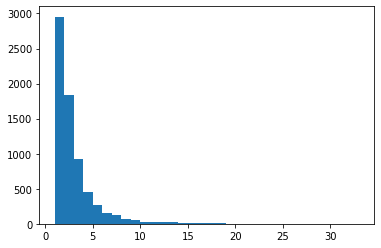

In [8]:
plt.hist(Train.campaign,bins=32)
plt.show()

In [9]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 30, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 30) & (dataframe['age'] <= 40), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 40) & (dataframe['age'] <= 60), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 60), 'age'] = 4
           
    return dataframe

#def campaign(dataframe):
#    dataframe.loc[dataframe['campaign'] <= 1, 'campaign'] = 1
#    dataframe.loc[(dataframe['campaign'] > 1) & (dataframe['campaign'] <= 3), 'campaign'] = 2
#    dataframe.loc[(dataframe['campaign'] > 3) & (dataframe['campaign'] <= 10), 'campaign'] = 3
#    dataframe.loc[(dataframe['campaign'] > 10), 'campaign'] = 4
           
#    return dataframe

In [10]:
age(Train)
age(Test)
#campaign(Train)
#campaign(Test)

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,2,technician,single,university.degree,no,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,10,3,services,married,high.school,unknown,yes,no,cellular,aug,thu,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
2,11,2,technician,single,professional.course,no,yes,no,telephone,mar,tue,2,999,0,nonexistent,-1.8,93.369,-34.8,0.646,5008.7
3,12,2,blue-collar,married,basic.9y,unknown,no,no,telephone,jul,wed,3,999,0,nonexistent,1.4,93.918,-42.7,4.956,5228.1
4,13,1,technician,single,university.degree,no,no,no,telephone,may,thu,5,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,9990,2,technician,divorced,unknown,no,yes,yes,cellular,jul,thu,8,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
2996,9995,3,management,married,university.degree,no,yes,no,cellular,nov,wed,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8
2997,9996,2,admin.,single,university.degree,no,yes,yes,telephone,jun,tue,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
2998,9999,2,management,married,high.school,no,no,no,cellular,may,fri,3,999,0,nonexistent,-1.8,93.876,-40.0,0.682,5008.7


In [11]:
Test['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
Train['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
Train.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,2,1,housemaid,single,high.school,no,no,no,telephone,may,...,3,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0
1,3,2,unemployed,married,basic.9y,unknown,yes,no,telephone,jun,...,6,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
2,4,3,blue-collar,married,basic.6y,unknown,no,no,cellular,nov,...,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
3,5,2,self-employed,single,university.degree,no,yes,no,cellular,may,...,3,999,1,2,-1.8,92.893,-46.2,1.299,5099.1,0
4,6,1,admin.,single,high.school,unknown,yes,no,cellular,jul,...,2,999,0,1,1.4,93.918,-42.7,4.963,5228.1,0


In [12]:
for i in (Train,Test):
    i['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
    i['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
    i['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)
    i['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
    i['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
    i['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in (Train,Test):
    i['contact']     = labelencoder_X.fit_transform(i['contact']) 
    i['month']       = labelencoder_X.fit_transform(i['month']) 
    i['day_of_week'] = labelencoder_X.fit_transform(i['day_of_week'])

In [14]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train.drop(columns=["client_id", "subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [15]:
#partitioning the Train to create artificial test set
partitions = partition(dataFrame = Train, splitStrategy = [0.8,0.2])
for (index,dataFrame) in enumerate(partitions):
    print(f"Partition {index} shape : {dataFrame.shape} ({len(dataFrame)/len(Train)})")

Partition 0 shape : (5600, 21) (0.8)
Partition 1 shape : (1400, 21) (0.2)


In [16]:
TTrain = partitions[0]
TTest = partitions[1]

## Random Forest

In [53]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train.drop(columns=["client_id", "subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [54]:
parameters = { 
    'n_estimators': [75,100,150,1000],
    'max_features': ['sqrt'],
    'max_depth' : range(6,10),
    'criterion' :['entropy'],
    'min_samples_split':range(18,21),
    'min_samples_leaf':range(1,5)
}

In [55]:
features = selected

x = Train[features]
y = Train['subscribe']


clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, scoring = 'roc_auc',cv=3)
clf.fit(X=x, y=y)
rf_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7991040168098978 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 150}


In [56]:
score = cross_val_score(rf_model, TTest[selected],TTest[target], cv=5, scoring='roc_auc')
score.mean()

0.7497826403399939

In [59]:
Test["subscribe"] = DataFrame(rf_model.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

,client_id,subscribe
0,1,0.049751
1,10,0.044502
2,11,0.428402
3,12,0.055813
4,13,0.049105


In [60]:
Final.to_csv(path+"FinalJMotylRF.csv",index=False)

## SVM

In [61]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train.drop(columns=["client_id", "subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [108]:
parameters = [{'kernel': ['linear','poly','rbf','sigmoid'], 'C': [1],'cache_size':[2000]}]

x = Train[selected]
y = Train[target]

clf = GridSearchCV(SVC(), parameters, n_jobs=-1, scoring = 'roc_auc',cv=3)
clf.fit(X=x, y=y)
svm_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7564741977524184 {'C': 1, 'cache_size': 2000, 'kernel': 'poly'}


In [66]:
svm_model2 = SVC(C= 2, cache_size= 2000, degree= 1, gamma='scale', kernel='linear',probability=True,max_iter=300000)
svm_model2.fit(Train[selected],Train[target])

C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=2, break_ties=False, cache_size=2000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=300000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
# Evaluate using cross-validation
score = cross_val_score(svm_model2, TTest[selected],TTest[target], cv=4, scoring='roc_auc')  # k=5
score.mean()

C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=300000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % sel

0.7293445169692849

In [72]:
Test["subscribe"] = DataFrame(svm_model2.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

,client_id,subscribe
0,1,0.044498
1,10,0.021809
2,11,0.267145
3,12,0.040823
4,13,0.059506


In [73]:
Final.to_csv(path+"FinalJMotylSVM.csv",index=False)

## Logistic

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

x = TTrain[selected]
y = TTrain[target]

logmodel = LogisticRegression(max_iter=5000) 
logmodel.fit(x,y)
logpred = logmodel.predict(TTest[selected])

In [75]:
print(confusion_matrix(TTest[target], logpred))
print(round(accuracy_score(TTest[target], logpred),2)*100)
LOGCV = (cross_val_score(logmodel,  TTrain[selected],  TTrain[target], cv=5, n_jobs=1, scoring = 'roc_auc').mean())
print(LOGCV)

[[1223   15]
 [ 129   33]]
90.0
0.7880651147098516


In [76]:
def stepwiseRegresion (trainingSet: DataFrame, validationSet: DataFrame, selectedFeatures: [str], target: [str], Model = DecisionTreeClassifier()) -> DataFrame:

    def computeAUC (forFeatures: [str]) -> ([str],float,float):
    
        Model.fit(trainingSet[forFeatures], trainingSet[target])

        trainingSet["proba donated stepwise"] = DataFrame(Model.predict_proba(trainingSet[forFeatures]))[1]
        validationSet["proba donated stepwise"]     = DataFrame(Model.predict_proba(validationSet[forFeatures]))[1]

        aucTraining = roc_auc_score(array(trainingSet[target]),array(trainingSet["proba donated stepwise"]))
        aucTest     = roc_auc_score(array(validationSet[target]),array(validationSet["proba donated stepwise"]))
        
        trainingSet.drop("proba donated stepwise", axis = 1)
        validationSet.drop("proba donated stepwise", axis = 1)

        return (forFeatures,aucTraining,aucTest)

    featuresOrder = []
    forwardSelection = []
    df={}
    
    for step in range(len(selectedFeatures)):
        out=step
        print(f"step {step+1}" + " of " + str(Model)[:12])
        aucs = []
        for feature in selectedFeatures:
            if feature not in featuresOrder:
                modelFeatures = featuresOrder.copy()
                modelFeatures.append(feature)
                aucs.append(computeAUC(forFeatures = modelFeatures))
            
        steps = DataFrame(aucs)
        steps.columns = ["Feature","AUC training", "AUC test"]
        steps = steps.sort_values(by=["AUC test"], ascending = False)

        featuresOrder = steps["Feature"].iloc[0]
        forwardSelection.append((step+1, steps["Feature"].iloc[0],steps["AUC training"].iloc[0],steps["AUC test"].iloc[0]))
        #print(forwardSelection[step][2])
        #if (forwardSelection[step][3] < (forwardSelection[step-1][3] -0.01)):
         #   print("AUC score decreasing ! Stopping stepwise regression.")
          #  out=step-1
           # break
        
        
    #df = DataFrame(forwardSelection)
    #df.columns = ("Step","Features","AUC Train","AUC Test")
    
    #df["model{0}".format(str(models[testing])[:12])]=forwardSelection[step][1:4]
    #print(df)
   
    return forwardSelection

In [78]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train.drop(columns=["client_id", "subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [79]:
logistic = LogisticRegression(solver = "lbfgs", max_iter = 5000)
linear = stepwiseRegresion(trainingSet      = TTrain, 
                                     validationSet          = TTest, 
                                     selectedFeatures = selected,
                                     target           = target,
                                        Model = logistic)

step 1 of LogisticRegr
step 2 of LogisticRegr
step 3 of LogisticRegr
step 4 of LogisticRegr
step 5 of LogisticRegr
step 6 of LogisticRegr
step 7 of LogisticRegr
step 8 of LogisticRegr
step 9 of LogisticRegr
step 10 of LogisticRegr
step 11 of LogisticRegr
step 12 of LogisticRegr
step 13 of LogisticRegr
step 14 of LogisticRegr
step 15 of LogisticRegr
step 16 of LogisticRegr
step 17 of LogisticRegr
step 18 of LogisticRegr
step 19 of LogisticRegr


In [83]:
linear2 = DataFrame(linear)
linear2.head(20)
feat=linear2.iloc[3,1]

In [85]:
grid={"C":np.logspace(-3,3,7), "penalty":['none',"l2"],'max_iter' : [5000]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,scoring='roc_auc')

x = Train[features]
y = Train['subscribe']


logreg_cv.fit(x,y)

C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sk

C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\test\.conda\envs\r-environment\lib\site-packages\sk

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [5000], 'penalty': ['none', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [86]:
logistic_model = logreg_cv.best_estimator_
print (logreg_cv.best_score_, logreg_cv.best_params_) 

0.7809360938962889 {'C': 10.0, 'max_iter': 5000, 'penalty': 'l2'}


In [87]:
logistic.fit(TTrain[feat], TTrain[target])

TTrain["proba donated stepwise"] = DataFrame(logistic.predict_proba(TTrain[feat]))[1]
TTest["proba donated stepwise"]     = DataFrame(logistic.predict_proba(TTest[feat]))[1]

aucTraining = roc_auc_score(array(TTrain[target]),array(TTrain["proba donated stepwise"]))
aucTest     = roc_auc_score(array(TTest[target]),array(TTest["proba donated stepwise"]))
        
#trainingSet.drop("proba donated stepwise", axis = 1)
#validationSet.drop("proba donated stepwise", axis = 1)
print(aucTraining,aucTest)

0.7596448288553551 0.7437050000997227


In [88]:
Test["subscribe"] = DataFrame(logistic_model.predict_proba(Test[features]))[1]

In [89]:
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

,client_id,subscribe
0,1,0.061007
1,10,0.045834
2,11,0.265895
3,12,0.027445
4,13,0.043564


In [90]:
Final.to_csv(path+"FinalJMotylLogi.csv",index=False)

## Decision Tree

In [91]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train.drop(columns=["client_id", "subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [92]:
features = selected

x = Train[features]
y = Train['subscribe']


parameters = {'max_depth':[3,4,5],
             'criterion':['gini', 'entropy'],
             'splitter':['best','random'],
             'min_samples_split':[9,10,11,12],
             'min_samples_leaf':[6,7,8]}

In [93]:
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1,scoring = 'roc_auc')
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7880261935336496 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 11, 'splitter': 'random'}


In [95]:
tree_model.fit(TTrain[selected],TTrain[target])


# Evaluate using cross-validation
score = cross_val_score(tree_model, TTest[selected],TTest[target], cv=5, scoring='roc_auc')  # k=5
score.mean()

0.7269881246636075

In [97]:
Test["subscribe"] = DataFrame(tree_model.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

,client_id,subscribe
0,1,0.052863
1,10,0.038560
2,11,0.058824
3,12,0.031390
4,13,0.017687


In [99]:
Final.to_csv(path+"FinalJMotylTree.csv",index=False)

## Gradient Boosting

In [106]:
#Separating the features from the target for gradientboosting fitting
target = "subscribe"
selected = Train.drop(columns=["client_id","subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [ ]:
features = selected

x = Train1[features]
y = Train1['subscribe']


parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025],
    "min_samples_split": [0.1,0.25],
    "min_samples_leaf": [0.1],
    "max_depth":[3,5,8],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.5,0.7],
    "n_estimators":[30,100,200]
    }
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,scoring='roc_auc')
clf.fit(X=x, y=y)
GB = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

In [ ]:
# Gradient Boost Regression
lr_churn = GradientBoostingClassifier(max_depth=3, n_estimators= 10, validation_fraction=0.2,criterion='friedman_mse',learning_rate=0.01,
                                     loss='deviance',max_features='log2',min_samples_leaf=0.1,min_samples_split=0.1,subsample=0.5)
lr_churn.fit(Train1[selected],Train1[target])

# Evaluate using cross-validation
score = cross_val_score(lr_churn, TTest[selected],TTest[target], cv=5, scoring='roc_auc')  # k=5
score.mean()

In [ ]:
Test1["subscribe"] = DataFrame(lr_churn.predict_proba(Test1[selected]))[1]
Final = Test1[["client_id","subscribe"]]
Final.reset_index()
Final.head()

In [ ]:
Final.to_csv(path+"FinalJMotylGradientB.csv",index=False)

## KNN

In [17]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train.drop(columns=["client_id", "subscribe"])
selected = selected.columns.values
print(selected)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [18]:
parameters = {
    'n_neighbors' : [300,500,700],
    'weights' : ['uniform','distance'],
    'metric' : ['manhattan'],
    'leaf_size':range(10,40)
}

x = Train[selected]
y = Train[target]

knnSearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, n_jobs=-1,scoring='roc_auc')
knnSearch.fit(X=x, y=y)

NameError: name 'clf' is not defined

In [19]:
KNN_model = knnSearch.best_estimator_
print (knnSearch.best_score_, knnSearch.best_params_)

0.7845304116867219 {'leaf_size': 11, 'metric': 'manhattan', 'n_neighbors': 300, 'weights': 'uniform'}


In [ ]:
X = Train1[selected]
y = Train1[target]

neigh = KNeighborsClassifier(n_neighbors=15,metric='manhattan',weights='uniform')
neigh.fit(X, y)

In [ ]:
score = cross_val_score(neigh, TTest[selected],TTest[target], cv=5, scoring='roc_auc')  # k=5
score.mean()

In [ ]:
Test["subscribe"] = DataFrame(KNN_model.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

In [ ]:
Final.to_csv(path+"FinalJMotylKNN.csv",index=False)

### Testing something else

In [101]:
# Import data
path2 = "C:/Users/jmotyl/Documents/Kaggle/mbd2019-in-class-competition-bank-mkt/Tentative cheaty/bank-additional/"

In [102]:
Full = pd.read_csv(path2+"bank-additional-full.csv",sep=";")

FileNotFoundError: [Errno 2] File C:/Users/jmotyl/Documents/Kaggle/mbd2019-in-class-competition-bank-mkt/Tentative cheaty/bank-additional/bank-additional-full.csv does not exist: 'C:/Users/jmotyl/Documents/Kaggle/mbd2019-in-class-competition-bank-mkt/Tentative cheaty/bank-additional/bank-additional-full.csv'

In [ ]:
Full.head()

In [ ]:
Full1 = Full
ToDummy = ["job","marital","education","default","housing","loan","contact","campaign","poutcome"]
for (terms) in (ToDummy) :
    Full1 = Full1.join(get_dummies(Full1[terms], prefix=terms+"is",drop_first=True))
    Full1 = Full1.drop(columns=terms)

In [ ]:
def reg(z):
    subscribe = ""
    if z == "yes":
        subscribe = 1
    elif z == "no":
        subscribe = 0
    return(subscribe)

In [ ]:
Full1["y"] = Full["y"].apply(reg)

In [ ]:
Full1[select].head()

In [ ]:
select=selected.index

In [ ]:
Full1[select].dtypes

In [ ]:
#Separating the features from the target for random forest fitting
target = "y"
selected = Full1.drop(columns=["month", "day_of_week","y"])
selected = selected.columns.values
print(selected)

In [ ]:
topVar2 = fisherscore(Full1[selected],Full1[target]).sort_values(by='fisher_score', ascending=False)

In [ ]:
selected=topVar2[:15]
print(selected)

In [ ]:
#partitioning the Train1 to create artificial test set
partitions = partition(dataFrame = Full1, splitStrategy = [0.8,0.2])
for (index,dataFrame) in enumerate(partitions):
    print(f"Partition {index} shape : {dataFrame.shape} ({len(dataFrame)/len(Full1)})")
    
Train = partitions[0]
Test = partitions[1]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(Full1[selected], Full1[target])

In [ ]:
rf_random.best_params_

In [ ]:
bestForest = RandomForestClassifier(n_estimators = 100, class_weight='balanced',max_depth=40,min_samples_split=10,
                                   min_samples_leaf=2,max_features="auto",bootstrap=True)

bestForest.fit(Train[selected], Train[target])

TTrain["proba donated"] = DataFrame(bestForest.predict_proba(Train[selected]))[1]
TTest["proba donated"]     = DataFrame(bestForest.predict_proba(Test[selected]))[1]

aucTraining       = roc_auc_score(array(Train[target]),array(Train["proba donated"]))
aucTest           = roc_auc_score(array(Test[target]),array(Test["proba donated"]))
        
Train.drop("proba donated", axis = 1)
Test.drop("proba donated",axis=1)

print(selected,aucTraining,aucTest)

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
eclf = VotingClassifier(
    estimators=[('rf',rf_model),('Knn', KNN_model)], voting='soft')
#tree_model
#logistic_model
#KNN_model
#rf_model

In [ ]:
eclf.fit(Train[selected],Train[target])

In [ ]:
score = cross_val_score(eclf, TTest[selected],TTest[target], cv=5, scoring='roc_auc')  # k=5
score.mean()

In [ ]:
Test["subscribe"] = DataFrame(eclf.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

In [ ]:
Final.to_csv(path+"FinalJMotylVotingRf+Knn.csv",index=False)

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train1.drop(columns=["client_id", "subscribe",'campaignis_32', 'campaignis_30', 'campaignis_28', 'campaignis_33'])
selected = selected.columns.values
print(selected)

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1,3,5,6,7],
              'learning_rate':[0.1,0.2,0.3]
             }

x = Train1[selected]
y = Train1[target]


DTC = tree_model
ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
Ada_search = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc',cv=3)
Ada_search.fit(x,y)
Ada_model = clf.best_estimator_
print (Ada_search.best_score_, Ada_search.best_params_)

In [ ]:
# Evaluate using cross-validation
score = cross_val_score(Ada_model, TTest[selected],TTest[target], cv=5, scoring='roc_auc')  # k=5
score.mean()

In [ ]:
Test1["subscribe"] = DataFrame(Ada_model.predict_proba(Test1[selected]))[1]
Final = Test1[["client_id","subscribe"]]
Final.reset_index()
Final.head()

In [ ]:
Final.to_csv(path+"FinalJMotylAdaBoost.csv",index=False)

## from scratch with different feature modifications -> Train2

In [119]:
path = "C:/Users/jmotyl/Documents/Kaggle/mbd2019-in-class-competition-bank-mkt/"

In [120]:
Train2 = pd.read_csv(path+"bank_mkt_train.csv",sep=",")
Test = pd.read_csv(path+ "bank_mkt_test.csv",sep=",")

In [121]:
Train2.head()

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,2,29,housemaid,single,high.school,no,no,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
1,3,39,unemployed,married,basic.9y,unknown,yes,no,telephone,jun,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2,4,49,blue-collar,married,basic.6y,unknown,no,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
3,5,32,self-employed,single,university.degree,no,yes,no,cellular,may,...,3,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
4,6,29,admin.,single,high.school,unknown,yes,no,cellular,jul,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0


In [122]:
Train2['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
Train2['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
Train2['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)
Train2['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
Train2['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
Train2['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
Train2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True) 
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
Train2['contact']= labelencoder_X.fit_transform(Train2['contact']) 
Train2['month']       = labelencoder_X.fit_transform(Train2['month']) 
Train2['day_of_week'] = labelencoder_X.fit_transform(Train2['day_of_week'])

In [123]:
Test['job'].replace(['housemaid' , 'services' , 'admin.' , 'blue-collar' , 'technician', 'retired' , 'management', 'unemployed', 'self-employed', 'unknown' , 'entrepreneur', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
Test['education'].replace(['basic.4y' , 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown' , 'university.degree' , 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
Test['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1, 2, 3, 4], inplace=True)
Test['default'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
Test['housing'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
Test['loan'].replace(['yes', 'no', 'unknown'],[1, 2, 3], inplace=True)
Test['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True) 
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
Test['contact']= labelencoder_X.fit_transform(Test['contact']) 
Test['month']       = labelencoder_X.fit_transform(Test['month']) 
Test['day_of_week'] = labelencoder_X.fit_transform(Test['day_of_week'])

In [124]:
pd.DataFrame.describe(Train2)

,client_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,5002.607857,40.343571,4.709429,1.495429,4.289571,2.204143,1.504429,1.878286,0.359714,4.248714,...,2.555000,962.264429,0.176143,1.172857,0.048814,93.568690,-40.472757,3.586876,5165.420157,0.117429
std,2891.990153,10.602487,2.459763,0.688095,2.200029,0.403103,0.546699,0.394689,0.479951,2.333833,...,2.631506,187.427662,0.496569,0.457173,1.587813,0.582999,4.682985,1.748872,73.305003,0.321953
min,2.000000,18.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,2485.750000,32.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,5018.500000,38.000000,4.000000,1.000000,4.000000,2.000000,1.000000,2.000000,0.000000,4.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,7512.500000,48.000000,5.000000,2.000000,7.000000,2.000000,2.000000,2.000000,1.000000,6.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,9998.000000,98.000000,12.000000,4.000000,8.000000,3.000000,3.000000,3.000000,1.000000,9.000000,...,33.000000,999.000000,6.000000,3.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [125]:
#Separating the features from the target for random forest fitting
target = "subscribe"
selected = Train2.drop(columns=["subscribe"])
selected = selected.columns.values
print(selected)

['client_id' 'age' 'job' 'marital' 'education' 'default' 'housing' 'loan'
 'contact' 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']


In [128]:
parameters = { 
    'n_estimators': [25,50,75,100,300],
    'max_features': ['sqrt'],
    'max_depth' : range(1,10),
    'criterion' :['entropy'],
    'min_samples_split':[2,6,10,14,18,20],
    'min_samples_leaf':[1,2,3,4,5]
}

In [129]:
x = Train2[selected]
y = Train2[target]

clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, scoring = 'roc_auc',cv=20)
clf.fit(X=x, y=y)
rf2_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

KeyboardInterrupt: 

In [ ]:
Test["subscribe"] = DataFrame(rf2_model.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

In [ ]:
Final["subscribe"] = Final["subscribe"].apply(lambda x : abs(1-x))
Final.head()

In [ ]:
Final.to_csv(path+"FinalJMotylRF2Extended2.csv",index=False)

## Additional Boosting

In [ ]:
params = {
        'boosting_type':'dart',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgbm

In [ ]:
train_set = lgbm.Dataset(Train2[selected], Train2[target], silent=False)
valid_set = lgbm.Dataset(Test[selected], Test["subscribe"], silent=False)
model = lgbm.train(params, train_set = train_set, num_boost_round=100,early_stopping_rounds=5,verbose_eval=5, valid_sets=valid_set)

In [ ]:
score = cross_val_score(model, TTest[selected],TTest["subscribe"], cv=5, scoring='roc_auc')  # k=5
score.mean()

In [ ]:
Test["subscribe"] = DataFrame(model.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

x = Train2[selected]
y = Train2[target]

logmodel = LogisticRegression(max_iter=5000) 
logmodel.fit(x,y)
logpred = logmodel.predict(Test[selected])

In [ ]:
print(confusion_matrix(Test["subscribe"], logpred))
print(round(accuracy_score(Test["subscribe"], logpred),2)*100)
LOGCV = (cross_val_score(logmodel,  Train2[selected],  Train2["subscribe"], cv=5, n_jobs=1, scoring = 'roc_auc').mean())
print(LOGCV)

## Changing Thresold on best algo

In [ ]:
bestalgo = pd.read_csv(path+"FinalJMotylRF2Extended.csv")

In [ ]:
bestalgo.head()

In [103]:
def Thresold(dataframe):
    dataframe.loc[dataframe['subscribe'] <= 0.49, 'subscribe'] = 0
    dataframe.loc[dataframe['subscribe'] > 0.49, 'subscribe'] = 1

def adding(dataframe):
    dataframe.loc[dataframe['subscribe']>0.40, 'subscribe'] = dataframe['subscribe']+0.05

In [104]:
adding(bestalgo)

NameError: name 'bestalgo' is not defined

In [ ]:
bestalgo.to_csv(path+"FinalJMotylRF2ExtendedThresoldTPlus05.csv",index=False)

### Let's try some upsampling on Train2

In [140]:
Train2.subscribe.value_counts()

0    6178
1     822
Name: subscribe, dtype: int64

In [141]:
# Separate majority and minority classes
Train2_majority = Train2[Train2.subscribe==0]
Train2_minority = Train2[Train2.subscribe==1]

In [142]:
Train2_minority.shape

(822, 21)

In [146]:
# Upsample minority class
Train2_minority_upsampled = resample(Train2_minority, 
                                             replace=True,     # sample with replacement
                                             n_samples=2000,    # to match majority class
                                             random_state=123) # reproducible results

In [147]:
# Combine majority class with upsampled minority class
Train2_upsampled = pd.concat([Train2_majority, Train2_minority_upsampled])
 
# Display new class counts
Train2_upsampled.subscribe.value_counts()
#campaign2013V1_upsampled is the new set to partition

0    6178
1    2000
Name: subscribe, dtype: int64

#### retraining random forest from here

In [150]:
#looking for best parameters
parameters = { 
    'n_estimators': [10,15,25,50],
    'max_features': ['sqrt'],
    'max_depth' : range(1,4),
    'criterion' :['entropy'],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5]
}

In [151]:
x = Train2_upsampled[selected]
y = Train2_upsampled[target]

clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, scoring = 'roc_auc',cv=5)
clf.fit(X=x, y=y)
rf3_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.7499805877651561 {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 10}


In [148]:
#testing with not upsampled parameters
parameters = { 
    'n_estimators': [150],
    'max_features': ['sqrt'],
    'max_depth' : [8],
    'criterion' :['entropy'],
    'min_samples_split':[18],
    'min_samples_leaf':[3]
}

In [149]:
x = Train2_upsampled[selected]
y = Train2_upsampled[target]

clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, scoring = 'roc_auc',cv=5)
clf.fit(X=x, y=y)
rf4_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.5260785674043211 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 150}


### KNN upsampled

In [154]:
parameters = {
    'n_neighbors' : [50,100,200,300],
    'weights' : ['uniform','distance'],
    'metric' : ['manhattan'],
    'leaf_size':range(10,20)
}

x = Train2_upsampled[selected]
y = Train2_upsampled[target]

knnSearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, n_jobs=-1,scoring='roc_auc')
knnSearch.fit(X=x, y=y)
KNN2_model = clf.best_estimator_
print (knnSearch.best_score_, knnSearch.best_params_)

0.8792372659617678 {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 300, 'weights': 'distance'}


In [155]:
Test["subscribe"] = DataFrame(KNN2_model.predict_proba(Test[selected]))[1]
Final = Test[["client_id","subscribe"]]
Final.reset_index()
Final.head()

,client_id,subscribe
0,1,0.165513
1,10,0.165513
2,11,0.465589
3,12,0.165513
4,13,0.165513


In [156]:
Final.to_csv(path+"FinalJMotylKNNup.csv",index=False)

### SVM upsampled

In [160]:
parameters = [{'kernel': ['poly','linear','sigmoid'], 'C': range(2,6),'degree':range(1,4),'cache_size':[2000]}]

x = Train2_upsampled[selected]
y = Train2_upsampled[target]

clf = GridSearchCV(SVC(), parameters, n_jobs=-1, scoring = 'roc_auc',cv=5)
clf.fit(X=x, y=y)
svm_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

KeyboardInterrupt: 